In [1]:
import numpy as np
import torch
import torch.utils.data as Data
from torch.utils.data.dataset import Dataset
import tqdm


NUM_QUESTIONS = 9
BATCH_SIZE = 64
HIDDEN_SIZE = 10
NUM_LAYERS = 1


def get_data_loader(data_path, batch_size, shuffle=False):
    data = torch.FloatTensor(np.load(data_path))
    data_loader = Data.DataLoader(data, batch_size=batch_size, shuffle=shuffle)
    return data_loader


train_loader = get_data_loader('train_data.npy', BATCH_SIZE, True)
test_loader = get_data_loader('test_data.npy', BATCH_SIZE, False)

In [ ]:
import logging
logging.getLogger().setLevel(logging.INFO)

In [2]:
from EduKTM import DKT

dkt = DKT(NUM_QUESTIONS, HIDDEN_SIZE, NUM_LAYERS)

In [ ]:
dkt.train(train_loader, epoch=10)
dkt.save("dkt.params")

evaluating: 100%|██████████| 211/211 [00:02<00:00, 85.23it/s] 


auc: 0.587587


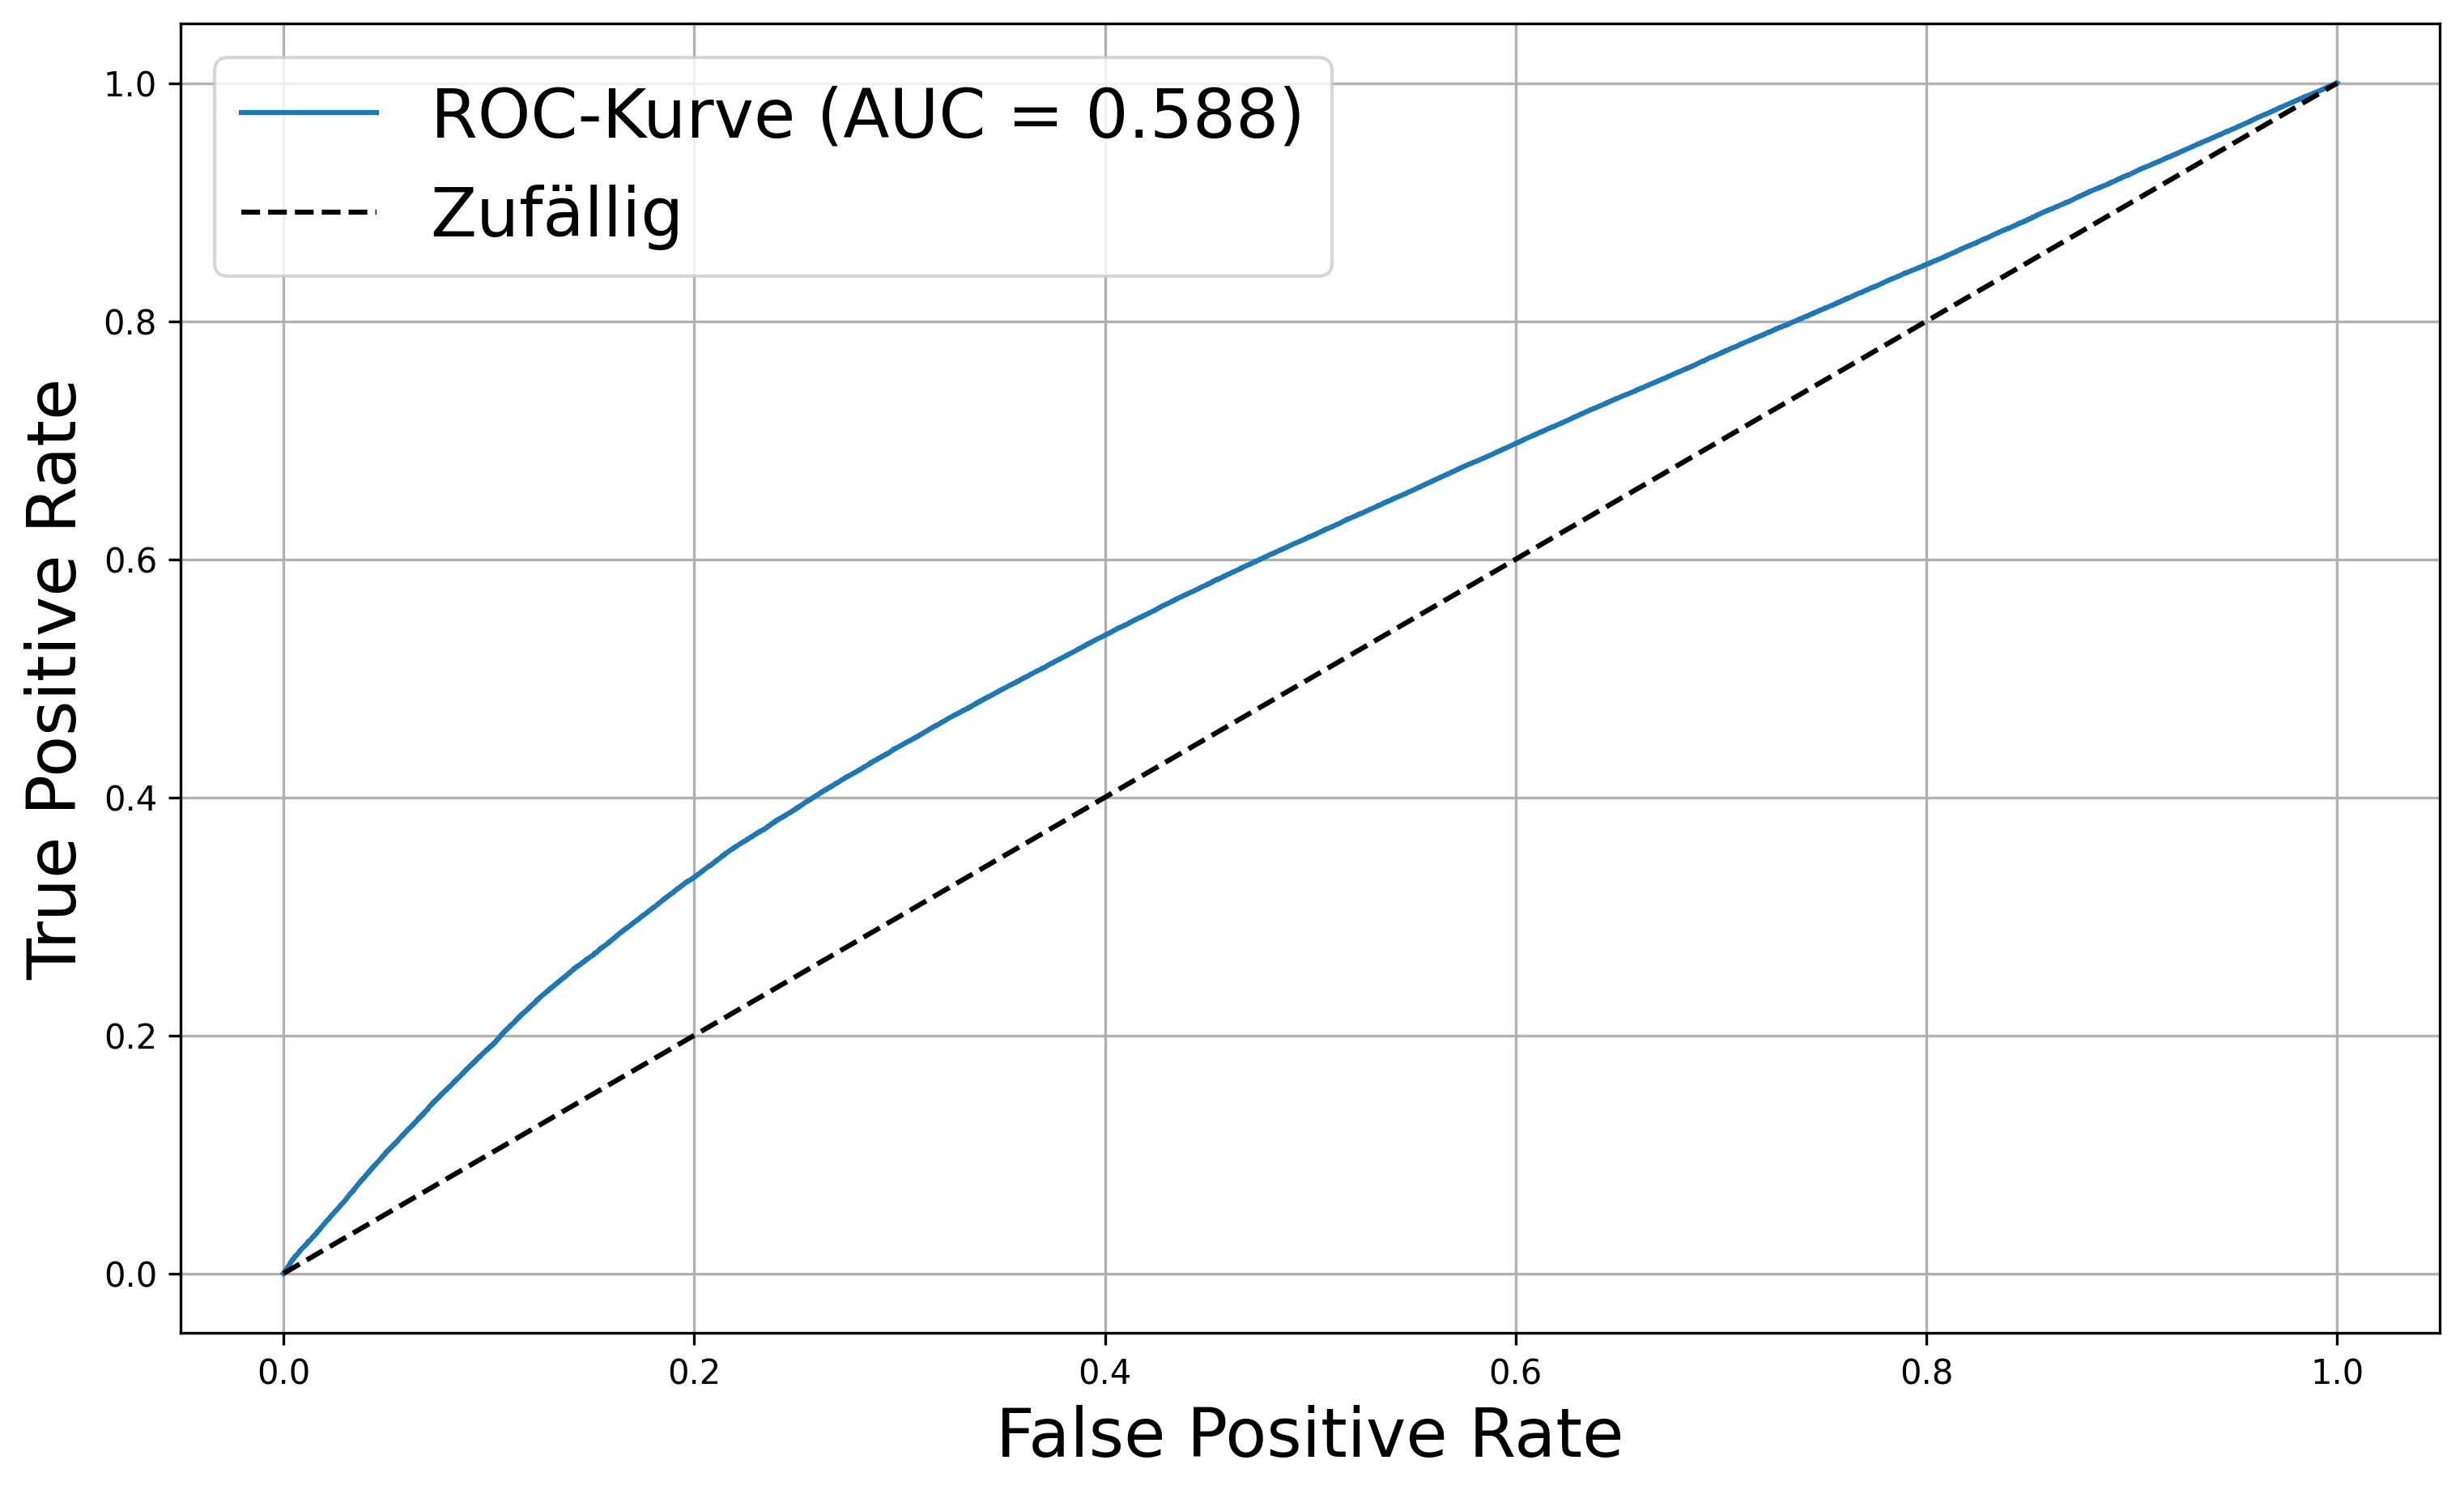

In [3]:
dkt.load("dkt.params")
auc = dkt.eval(test_loader)
print("auc: %.6f" % auc)